# Progetto Cognitive

In [1]:
#libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical 
import seaborn as sns

#mount drive

#from google.colab import drive
#drive.mount("/content/gdrive")

In [ ]:
url = "https://raw.githubusercontent.com/andreamarchini/Cognitive/main/PID5_df.csv"

data = pd.read_csv(url, sep = ";")

honest = data[data['CONDITION'] == 'H']
dishonest = data[data['CONDITION'] == 'D']


In [ ]:
#split X and y
X = data.iloc[:,0:data.shape[1]-1]
X = X.to_numpy()
X_norm = X/5

y = data['CONDITION']

In [ ]:
X

array([[0, 0, 2, ..., 0, 0, 2],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 2, 1, 2],
       ...,
       [3, 0, 1, ..., 3, 3, 0],
       [3, 3, 2, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

In [ ]:
#0 is honest, 1 is disonest
y1 = np.zeros(412)
y2 = np.ones(412)
y = np.concatenate((y1, y2), axis = None)


In [ ]:
#train test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.15, shuffle = True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.10, shuffle = True
)


In [ ]:
y_test

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0.])

In [ ]:
#try Random Forest
clf_forest = RandomForestClassifier(max_depth = 10, random_state = 0)

clf_forest.fit(X, y)
# y_pred_forest = clf_forest.predict(X_test)

# acc_forest = accuracy_score(y_test, y_pred_forest)

# print(acc_forest)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
clf_forest.feature_importances_

array([0.00428031, 0.07808357, 0.00143411, 0.00669608, 0.00219812,
       0.0007707 , 0.00195443, 0.00074702, 0.00204499, 0.0014696 ,
       0.00639889, 0.00082183, 0.00054574, 0.00016329, 0.00124058,
       0.00303074, 0.00820599, 0.00086328, 0.01061632, 0.00058616,
       0.00113099, 0.00679659, 0.0004394 , 0.010814  , 0.00218688,
       0.00958865, 0.00055539, 0.00042753, 0.00071652, 0.00060158,
       0.00394979, 0.00143503, 0.0009001 , 0.0016707 , 0.00099883,
       0.03440742, 0.03498516, 0.00142324, 0.00077237, 0.0004497 ,
       0.00252156, 0.00569841, 0.00053651, 0.00295363, 0.00117598,
       0.00166423, 0.00033562, 0.00080716, 0.00038823, 0.00133662,
       0.00091494, 0.01696791, 0.00805646, 0.01190061, 0.00627098,
       0.00501027, 0.00606146, 0.00363947, 0.00162557, 0.00055856,
       0.00071178, 0.00123267, 0.00068055, 0.00950141, 0.00100127,
       0.00046827, 0.00069499, 0.00040252, 0.00241382, 0.00972602,
       0.00826468, 0.01535604, 0.00156436, 0.00100037, 0.00108

In [ ]:
#try Random Forest
clf_forest = RandomForestClassifier(max_depth = 4, random_state = 0)

clf_forest.fit(X_train_val, y_train_val)
y_pred_forest = clf_forest.predict(X_test)

acc_forest = accuracy_score(y_test, y_pred_forest)

print(acc_forest)

0.967741935483871


In [ ]:
clf_tree = DecisionTreeClassifier(random_state = 0)
clf_tree.fit(X_train_val, y_train_val)
y_pred_tree = clf_tree.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)

print(acc_tree)

0.8951612903225806


In [ ]:
feats = []
for i in range(len(clf_forest.feature_importances_)):
  feats.append((i,clf_forest.feature_importances_[i]))
feats.sort(reverse = True, key = lambda x: x[1])

for elem in feats:
  print("question",elem[0],": ",elem[1])

question 1 :  0.0799051658363773
question 152 :  0.06330881729687729
question 189 :  0.059359255268349384
question 132 :  0.053322049549863346
question 36 :  0.04050119668063004
question 171 :  0.03576199243058581
question 165 :  0.03513158464608455
question 35 :  0.03431633942854537
question 191 :  0.03147473565575349
question 216 :  0.025662279092125664
question 206 :  0.024783244450574168
question 151 :  0.024688867459220422
question 184 :  0.023845155295299483
question 71 :  0.02342225724104082
question 18 :  0.021054962543203267
question 153 :  0.019212065821059453
question 3 :  0.018560008437732242
question 51 :  0.017978648826666707
question 70 :  0.016191381640897447
question 207 :  0.014426942031252745
question 197 :  0.014099865734190023
question 53 :  0.01357146386887645
question 142 :  0.01308425345594795
question 135 :  0.012859824321789028
question 21 :  0.012093989369811509
question 204 :  0.011913958340761609
question 182 :  0.011569271324956998
question 200 :  0.011284

## Some models

In [ ]:
import graphviz 
import sys
import pandas as pd
from IPython.display import display, HTML
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def model_train_evaluate(model,grid_params,X_train_val,y_train_val):
  # train
  print("Training...")
  model_v1 = GridSearchCV(model, grid_params, n_jobs= -1, cv = 5, return_train_score = True)
  model_v1.fit(X_train_val, y_train_val)
 
  # models comparison: prints a nice table with a comparison between different hyperparameters
  # configurations. Note: if you can't see the table, open this file with Google Colab
  results = pd.DataFrame(model_v1.cv_results_)
  results = results.sort_values(by=["rank_test_score"])
  results = results[["params", "rank_test_score","mean_train_score","mean_test_score"]]
  display(HTML(results.to_html()))

  # evaluate
  print("Evaluating...")  
  y_train_val_pred = model_v1.predict(X_train_val)

  # print results
  model_name = model.__class__.__name__
  print(f"{model_name}\tTrain_val: {f1_score(y_train_val, y_train_val_pred,average = 'macro'):.4f}")
  print(f"\tBest parameters: {model_v1.best_params_}")

  # returns the best model
  best_model = {
      'model' : model_v1.best_estimator_,
      'y_train_val_pred' : y_train_val_pred,
  }
  return best_model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train the random forest
rf_grid_params = {
    'n_estimators': (15, 20, 30, 40, 50),
    'criterion': ['entropy'],
    'max_depth': (None, 5, 10, 20, 30),
}
rf_clf = RandomForestClassifier(random_state= 123)
rf_trained = model_train_evaluate(rf_clf,rf_grid_params,X_train_val,y_train_val)

Training...


,params,rank_test_score,mean_train_score,mean_test_score
24,"{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}",1,1.000000,0.954286
4,"{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}",1,1.000000,0.954286
19,"{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}",1,1.000000,0.954286
8,"{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 40}",4,0.966429,0.952857
13,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 40}",4,0.995714,0.952857
22,"{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 30}",6,0.997500,0.951429
2,"{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 30}",6,0.997500,0.951429
3,"{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 40}",6,1.000000,0.951429
7,"{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 30}",6,0.966429,0.951429
18,"{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 40}",6,1.000000,0.951429


Evaluating...
RandomForestClassifier	Train_val: 0.9986
	Best parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


In [ ]:
from sklearn.svm import SVC

# train the svc
svc_grid_params = {
    'C': [1,0.1,0.01,0.001],
    'kernel': ['rbf','linear'],
}

svc_clf = SVC(random_state= 123)
svc_trained = model_train_evaluate(svc_clf,svc_grid_params,X_train_val,y_train_val)

Training...


,params,rank_test_score,mean_train_score,mean_test_score
0,"{'C': 1, 'kernel': 'rbf'}",1,0.973929,0.955714
7,"{'C': 0.001, 'kernel': 'linear'}",2,0.961786,0.952857
2,"{'C': 0.1, 'kernel': 'rbf'}",3,0.953929,0.951429
5,"{'C': 0.01, 'kernel': 'linear'}",4,0.980357,0.950000
3,"{'C': 0.1, 'kernel': 'linear'}",5,0.999286,0.931429
1,"{'C': 1, 'kernel': 'linear'}",6,1.000000,0.927143
4,"{'C': 0.01, 'kernel': 'rbf'}",7,0.909643,0.908571
6,"{'C': 0.001, 'kernel': 'rbf'}",8,0.587857,0.590000


Evaluating...
SVC	Train_val: 0.9757
	Best parameters: {'C': 1, 'kernel': 'rbf'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# train the K-NN
knn_grid_params = {
    'n_neighbors': (2,5,7,10,20,25,30,50)
}
knn_clf = KNeighborsClassifier()
knn_trained = model_train_evaluate(knn_clf,knn_grid_params,X_train_val,y_train_val)

Training...


,params,rank_test_score,mean_train_score,mean_test_score
1,{'n_neighbors': 5},1,0.933571,0.912857
2,{'n_neighbors': 7},2,0.928571,0.911429
5,{'n_neighbors': 25},3,0.909643,0.907143
4,{'n_neighbors': 20},4,0.907857,0.904286
7,{'n_neighbors': 50},4,0.906429,0.904286
6,{'n_neighbors': 30},6,0.905714,0.902857
3,{'n_neighbors': 10},7,0.908929,0.897143
0,{'n_neighbors': 2},8,0.920357,0.878571


Evaluating...
KNeighborsClassifier	Train_val: 0.9297
	Best parameters: {'n_neighbors': 5}


In [ ]:
# train the K-NN
knn1_grid_params = {
    'n_neighbors': (5,6,7,8,9,10)
}
knn1_clf = KNeighborsClassifier()
knn1_trained = model_train_evaluate(knn1_clf,knn1_grid_params,X_train_val,y_train_val)

Training...


,params,rank_test_score,mean_train_score,mean_test_score
0,{'n_neighbors': 5},1,0.933571,0.912857
2,{'n_neighbors': 7},2,0.928571,0.911429
1,{'n_neighbors': 6},3,0.915714,0.905714
4,{'n_neighbors': 9},3,0.922857,0.905714
3,{'n_neighbors': 8},5,0.912500,0.902857
5,{'n_neighbors': 10},6,0.908929,0.897143


Evaluating...
KNeighborsClassifier	Train_val: 0.9297
	Best parameters: {'n_neighbors': 5}


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.python.framework.random_seed import set_random_seed
from keras.callbacks import EarlyStopping


def NN_trainer(X,y,hidden_layers,units_per_layer,n_batch_size=16,n_epochs=1000,augmentation_layer=None):

  # get input size
  input_size = X.shape[1]
  n_classes = y.shape[1]
    
  # early stopping
  es = EarlyStopping(monitor='val_loss',
                   mode='min', 
                   patience = 5, 
                   verbose=0)

  np.random.seed(123)
  set_random_seed(2)

  # build the model
  model = Sequential()

  # augmentation layer
  if augmentation_layer is not None:
    X = X.reshape((X.shape[0],28,28,1))
    model.add(augmentation_layer)
    model.add(Flatten())
  else:
    model.add(Dense(input_dim = input_size, units=input_size , activation='relu')) #input layer

  # add hidden layers
  for i in range(hidden_layers):
    model.add(Dense(units = units_per_layer, activation = 'relu'))
  model.add(Dense(n_classes, activation='softmax')) #output layer

  # Configure the model and start training
  model.compile(loss='categorical_crossentropy', #loss metric
      optimizer='sgd',  #optimizer
      metrics=['accuracy']) #displayed metric

  # Fit
  history = model.fit(X, y, epochs=n_epochs, batch_size=n_batch_size, verbose=0, validation_split=0.25, callbacks=[es])
  
  return model, history

In [ ]:
def plot_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

import operator

def grid_search_NN(grid_params,X,y,data_augmentation=None):
  accumulator = []
  # for every value of hidden layers
  for i in grid_params['hidden_layers']:
    # for every value of units per layer
    for j in grid_params['units_per_layer']:
      # for every value of batch size
      for k in grid_params['batch_size']:
        # train the NN with NN_trainer
        model, history = NN_trainer(X,y,hidden_layers=i,units_per_layer=j,n_batch_size=k,augmentation_layer=data_augmentation)
        accumulator.append([
             model,
             i,
             j,
             k,
             history.history['accuracy'][-1],
             history.history['val_accuracy'][-1]
        ])
        print("Trained model with",i,"hidden layers and",j,"neurons per layer",k,"batch_size")
  # sort by validation accuracy
  accumulator.sort(key=operator.itemgetter(5), reverse=True)
  # create a data frame table to print it nicely
  results = pd.DataFrame(accumulator)
  results = results.drop([0],axis=1)
  results.rename(columns={1: 'hidden_layers', 2: 'units_per_layer',3:'batch_size', 4:'train_accuracy', 5:'val_accuracy'}, inplace=True)
  display(HTML(results.to_html()))
  return accumulator[0][0]

In [ ]:
y_train_val_cat = to_categorical(y_train_val, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
NN_grid_params = {
    'hidden_layers': [1,2,3],
    'units_per_layer': [50,100,150,200],
    'batch_size': [20,200,500]
}

NN_model = grid_search_NN(NN_grid_params,X_train_val,y_train_val_cat)

Trained model with 1 hidden layers and 50 neurons per layer 20 batch_size
Trained model with 1 hidden layers and 50 neurons per layer 200 batch_size
Trained model with 1 hidden layers and 50 neurons per layer 500 batch_size
Trained model with 1 hidden layers and 100 neurons per layer 20 batch_size
Trained model with 1 hidden layers and 100 neurons per layer 200 batch_size
Trained model with 1 hidden layers and 100 neurons per layer 500 batch_size
Trained model with 1 hidden layers and 150 neurons per layer 20 batch_size
Trained model with 1 hidden layers and 150 neurons per layer 200 batch_size
Trained model with 1 hidden layers and 150 neurons per layer 500 batch_size
Trained model with 1 hidden layers and 200 neurons per layer 20 batch_size
Trained model with 1 hidden layers and 200 neurons per layer 200 batch_size
Trained model with 1 hidden layers and 200 neurons per layer 500 batch_size
Trained model with 2 hidden layers and 50 neurons per layer 20 batch_size
Trained model with 2 

,hidden_layers,units_per_layer,batch_size,train_accuracy,val_accuracy
0,3,200,20,0.992381,0.971429
1,1,50,200,0.980952,0.965714
2,1,150,20,0.994286,0.965714
3,1,150,200,0.980952,0.965714
4,1,150,500,0.973333,0.965714
5,2,200,20,1.000000,0.965714
6,3,200,200,0.984762,0.965714
7,1,50,20,0.994286,0.960000
8,1,100,20,0.994286,0.960000
9,1,200,20,0.994286,0.960000


## Dimensionality Reduction

In [ ]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 1.1 MB 69.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7dc3085d5aede06997d01578867056ac3506be3e51c9e42445d13126fb59f4ec
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=4b544b0ddbbbe865ee764ea92aa5b54398419ddc4ef9f545f137bd0fb98c0a2f
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


### UMAP
Problem: random position of results on multiple runs

In [ ]:
reduced_res = umap.UMAP(n_neighbors=50,n_components=2).fit_transform(X_train_val)

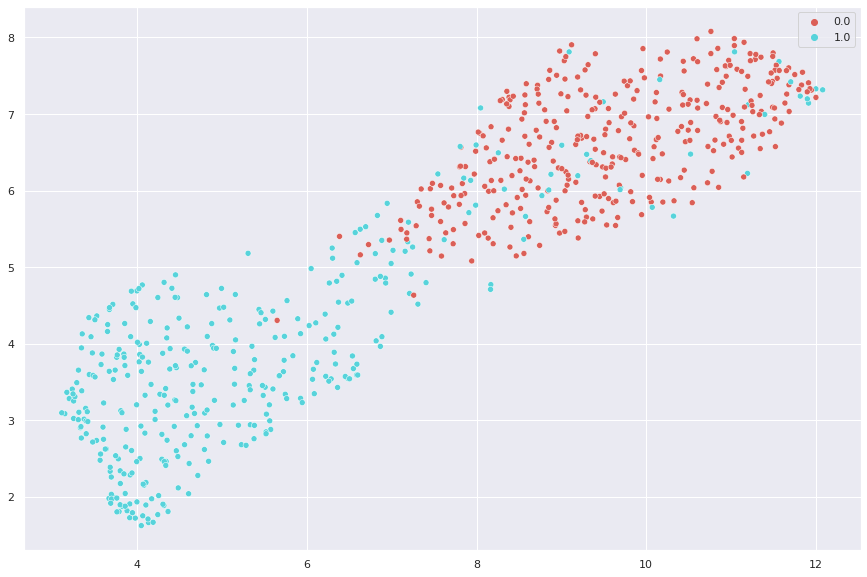

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x = reduced_res[:,0], y = reduced_res[:,1], hue = y_train_val, palette = sns.hls_palette(2), legend = 'full')

### PCA

In [ ]:
from sklearn.decomposition import PCA

def pca_compress(X,n_components):
  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X)
  X_reconstruced = pca.inverse_transform(X_pca)
  return X_pca, X_reconstruced



In [ ]:
X_train_val_pca, _ = pca_compress(X_train_val,2)

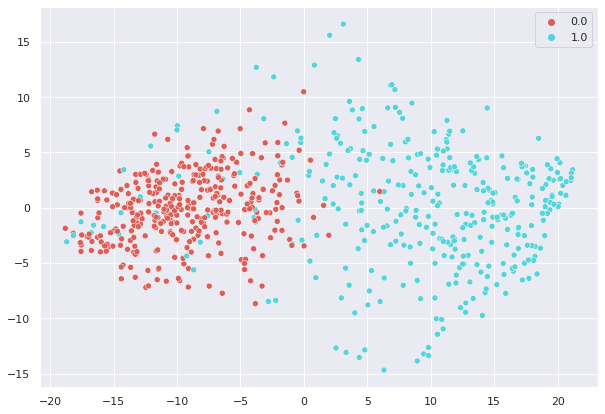

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(x = X_train_val_pca[:,0], y = X_train_val_pca[:,1], hue = y_train_val, palette = sns.hls_palette(2), legend = 'full')

## Another dataset

In [ ]:
data1 = pd.read_csv("NAQ_R_df.csv", sep = ";")

honest = data1[data1['CONDITION'] == 'H']
dishonest = data1[data1['CONDITION'] == 'D']


FileNotFoundError: ignored

In [ ]:
data1

In [ ]:
#split X and y
X1 = data1.iloc[:,0:data1.shape[1]-1]
X1 = X1.to_numpy()
X1_norm = X1/5

y1 = data1['CONDITION']

In [ ]:
X1.shape

In [ ]:
#0 is honest, 1 is disonest
y11 = np.zeros(444)
y12 = np.ones(444)
y1 = np.concatenate((y11, y12), axis = None)
y1

In [ ]:
#train test split
X_train_val1, X_test1, y_train_val1, y_test1 = train_test_split(
    X1, y1, test_size = 0.15, shuffle = True
)
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X_train_val1, y_train_val1, test_size = 0.10, shuffle = True
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train the random forest
rf_grid_params = {
    'n_estimators': (15, 20, 30, 40, 50),
    'criterion': ['entropy'],
    'max_depth': (None, 5, 10, 20, 30),
}
rf_clf = RandomForestClassifier(random_state= 123)
rf_trained = model_train_evaluate(rf_clf,rf_grid_params,X_train_val1,y_train_val1)

In [ ]:
X_train_val_pca1, _ = pca_compress(X_train_val1,2)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x = X_train_val_pca1[:,0], y = X_train_val_pca1[:,1], hue = y_train_val1, palette = sns.hls_palette(2), legend = 'full')

It has a different shape from the other dataset

In [ ]:
reduced_res1 = umap.UMAP(n_neighbors=5,n_components=2).fit_transform(X_train_val1)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x = reduced_res1[:,0], y = reduced_res1[:,1], hue = y_train_val1, palette = sns.hls_palette(2), legend = 'full')

## Crazy idea

In [ ]:
# !pip install -U "tensorflow==2.9.0"
!pip install -U "tensorflow-text==2.9.0"
import tensorflow as tf
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 14.7 MB/s 


In [ ]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
#try Random Forest
clf_forest = RandomForestClassifier(max_depth = 10, n_estimators = 40 )

clf_forest.fit(X, y)

labels = clf_forest.feature_importances_
labels


array([2.48048783e-03, 9.28478116e-02, 4.31648393e-04, 3.15942727e-03,
       1.87079338e-03, 1.20093544e-03, 7.05034707e-04, 9.23609971e-04,
       5.17755604e-04, 8.38014291e-04, 6.49883395e-03, 8.09858565e-04,
       2.38246237e-05, 9.43327266e-05, 1.79190990e-03, 1.13501231e-03,
       3.46357560e-03, 6.21040297e-04, 3.81593425e-03, 4.83693690e-04,
       1.92902017e-04, 1.45858239e-03, 1.99075202e-03, 1.78186996e-03,
       1.09918753e-03, 1.43643755e-02, 9.24053069e-04, 4.17720113e-04,
       7.60173460e-04, 5.74784690e-04, 1.13108952e-02, 1.13356047e-03,
       1.17402207e-03, 1.56602149e-03, 4.67162612e-04, 2.27795396e-02,
       3.78460042e-02, 9.75203917e-04, 2.68357966e-03, 6.18078214e-04,
       1.12605516e-03, 2.23431654e-02, 1.17772337e-03, 1.41818203e-03,
       4.78442044e-04, 5.83020928e-04, 3.24354211e-04, 2.17112271e-03,
       1.39155465e-03, 2.37964292e-04, 7.56561628e-04, 2.78224353e-02,
       3.84084332e-03, 1.77183339e-02, 5.09776662e-03, 9.07107259e-04,
      

In [ ]:
qst = pd.read_csv("questions.csv",header=None)
qst

FileNotFoundError: ignored

In [ ]:
qst = qst.drop(0, axis=1)
qst

In [ ]:
X_train_data = np.array(qst[:160][1])
X_validation_data = np.array(qst[161:180][1])
X_test_data = np.array(qst[181:][1])

y_train_data = np.array(labels[:160])
y_validation_data = np.array(labels[161:180])
y_test_data = np.array(labels[181:])


In [ ]:
# embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
embedding = "https://tfhub.dev/google/Wiki-words-250/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)


In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Reshape((250, 1)))
model.add(tf.keras.layers.LSTM(units=64, activation='tanh'))
model.add(tf.keras.layers.Reshape((64, 1)))
model.add(tf.keras.layers.LSTM(units=16, activation='tanh'))

# model.add(tf.keras.layers.Dense(1024, activation='relu'))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [ ]:
history = model.fit(X_train_data,y_train_data,
                    batch_size=30,
                    epochs=10,
                    validation_data=(X_validation_data,y_validation_data),
                    verbose=1)


In [ ]:
model.evaluate(X_test_data,y_test_data)


In [ ]:
predictions = model.predict(X_test_data)


In [ ]:
comparison = pd.DataFrame(predictions,labels[181:])
comparison

# Andrea

In [2]:
#let's give a look to how the features are considered important by people
X_honest = X[0:411, : ]
X_dishonest = X[412:823, : ]

honest_sum = np.sum(X_honest, axis = 0)/412
dishonest_sum = np.sum(X_dishonest, axis = 0)/412

distances = np.abs(honest_sum - dishonest_sum)

honest_dev = np.std(X_honest, axis = 0)
dishonest_dev = np.std(X_dishonest, axis = 0)

sums = np.concatenate((honest_sum, dishonest_sum, distances), axis = 0)
sums = np.asmatrix(sums)
sums = np.reshape(sums, (3,220))


dataframe = pd.DataFrame(data = sums, columns = honest.columns[0:220], index = ['honest', 'dishonest', 'distances'])


NameError: ignored

In [ ]:
rslt_df = dataframe.sort_values(by = 'distances', axis = 1, ascending = False)
rslt_df

,Q192,Q2,Q217,Q190,Q139,Q154,Q153,Q207,Q37,Q166,...,Q140,Q121,Q112,Q111,Q155,Q35,Q95,Q102,Q87,Q164
honest,0.140777,0.436893,0.439320,0.519417,0.334951,0.303398,0.240291,0.361650,0.235437,0.305825,...,1.958738,1.575243,1.927184,2.009709,1.643204,1.934466,1.376214,1.774272,2.106796,2.019417
dishonest,2.160194,2.436893,2.366505,2.429612,2.245146,2.208738,2.145631,2.225728,2.087379,2.131068,...,2.162621,1.779126,2.128641,1.851942,1.774272,1.808252,1.439320,1.723301,2.109223,2.016990
distances,2.019417,2.000000,1.927184,1.910194,1.910194,1.905340,1.905340,1.864078,1.851942,1.825243,...,0.203883,0.203883,0.201456,0.157767,0.131068,0.126214,0.063107,0.050971,0.002427,0.002427


Text(0, 0.5, 'distance')

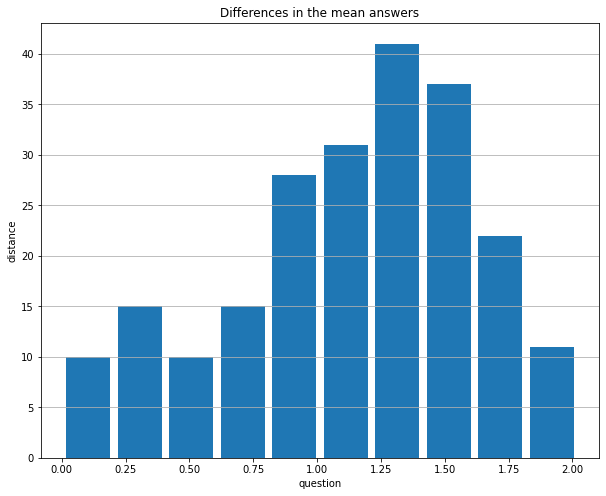

In [ ]:
#plt.plot(rslt_df.iloc[2,:])

plt.figure(figsize=(10,8))
plt.hist(x = rslt_df.iloc[2,:], rwidth = 0.85, bins = 10)
plt.title("Differences in the mean answers")
plt.grid(axis = "y")
plt.xlabel("question")
plt.ylabel("distance")

Features with higher gap between average honest answer and average dishonest answer are the ones which are considered more crucial by the users. Now let's look among the honest reviews the ones which are closer to the average dishonest answers, in order to detect liars.

In [ ]:
#reduce number of features to the ones with distance >=1.5
reduced_rslt_df = rslt_df[rslt_df.columns[rslt_df.iloc[2] >=1.5]]

#most important features over honest dataset
reduced_honest_df = honest[reduced_rslt_df.columns]

#compute differences between honest and average dishonest
detect_mad = reduced_honest_df - (reduced_rslt_df.iloc[1].round(0))
print(detect_mad)

     Q192   Q2  Q217  Q190  Q139  Q154  Q153  Q207  Q37  Q166  ...  Q197  \
0    -2.0 -2.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -2.0   
1    -2.0 -1.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -1.0   
2    -2.0 -2.0  -1.0  -1.0  -2.0   0.0  -2.0  -1.0 -2.0  -1.0  ...  -1.0   
3    -2.0 -2.0  -2.0  -2.0  -2.0   0.0  -2.0  -2.0 -1.0  -2.0  ...  -2.0   
4    -2.0 -2.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -2.0   
..    ...  ...   ...   ...   ...   ...   ...   ...  ...   ...  ...   ...   
407  -2.0 -1.0  -2.0  -1.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -2.0   
408  -2.0 -2.0  -2.0  -1.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -2.0   
409  -2.0 -1.0  -2.0  -1.0  -2.0  -2.0  -2.0  -2.0 -2.0  -2.0  ...  -1.0   
410  -2.0  0.0   1.0   1.0  -1.0  -2.0  -2.0  -2.0  0.0  -2.0  ...  -2.0   
411  -2.0 -2.0  -2.0  -1.0  -2.0  -2.0  -2.0  -1.0 -2.0  -1.0  ...  -2.0   

     Q157  Q25  Q116  Q136  Q31  Q156  Q77  Q171  Q163  
0    -2.0 -2.0  -2.0  -2.0 -1.

Text(0, 0.5, 'number of participants')

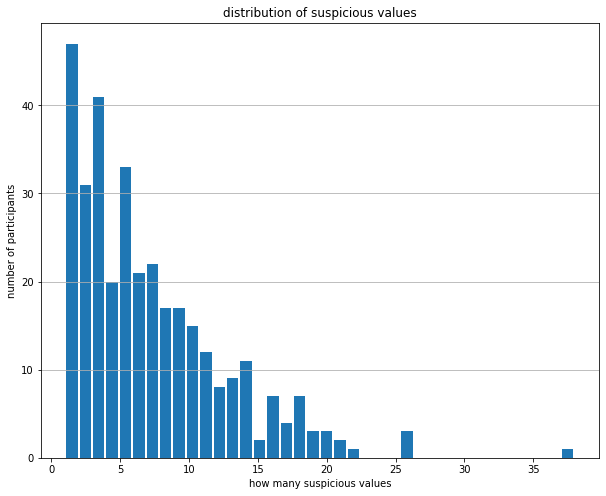

In [ ]:
#count how many >=0 values each row, which means values >= mean of dishonest (rounded)
count_mad_stat = (detect_mad>=0).sum(axis=1)
count_mad_stat = count_mad_stat[count_mad_stat>0].sort_values(ascending=False)

#hist of how many stats
plt.figure(figsize=(10,8))
plt.hist(count_mad_stat, bins = count_mad_stat.max(), rwidth=0.85)
plt.title("distribution of suspicious values")
plt.grid(axis = "y")
plt.xlabel("how many suspicious values")
plt.ylabel("number of participants")
#count_mad_stat

#mister 390 is the closest to madness

In [ ]:
count_mad_stat

390    38
355    26
84     26
276    26
151    22
       ..
112     1
376     1
103     1
378     1
326     1
Length: 337, dtype: int64

In [ ]:
X[802]-X[390]

array([ 0,  1,  0, -1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  1, -1,
        0,  0, -2,  1,  1,  1,  0, -1,  1,  1,  0,  0,  0, -1,  0,  1,  0,
        1,  0,  2,  0, -1,  0,  1,  1, -2,  0, -2,  1, -1,  1,  1,  1,  1,
        0,  0,  0, -1,  1,  0,  0,  1,  0,  0,  2, -1,  0,  0,  0,  1, -1,
        0,  0, -1,  1,  0, -1,  0,  1, -1, -2, -2, -1,  0,  0,  0,  1, -1,
        1,  2,  1, -2,  1,  0,  1, -2,  1,  0,  0, -1,  0, -2,  1,  0,  1,
       -2,  0, -1,  1, -2,  0,  0,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0,
        0,  2,  0, -1,  1,  0,  0,  0, -3,  1,  2,  0,  0,  0, -1, -1,  0,
       -1,  1,  0,  0, -1,  0,  0,  1,  0, -1, -1,  1,  0,  0, -1,  1,  0,
        0, -1,  1, -1,  0,  0,  0, -1,  0,  1,  0,  1,  0, -2,  1, -1,  0,
        0,  0,  1,  2, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  0,  0, -2,  0, -1,
        2, -2,  1,  0,  0,  1, -1,  0,  0,  0,  0,  0, -1, -1,  1,  0])

In [ ]:
honest.iloc[390]

Q1           2
Q2           1
Q3           2
Q4           2
Q5           2
            ..
Q217         3
Q218         3
Q219         2
Q220         2
CONDITION    H
Name: 390, Length: 221, dtype: object

Provo su gli altri dataset



In [ ]:
for i in range(nrows):
    for j in range(ncols):
      n = i*ncols+j
      ax = axes[i][j]
      globals()[names[n]+"_honest"].iloc[:,0:-1].stack().value_counts().sort_index().plot(ax = ax, kind = 'bar', position = 0, width = 0.3)
      globals()[names[n]+"_dishonest"].iloc[:,0:-1].stack().value_counts().sort_index().plot(ax = ax, kind = 'bar', color = 'red', position = 1, width = 0.3)

      ax.set_title(names[n])

#Matteo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123)

In [4]:
names = ["DT_CC","DT_JI","PRMQ","PCL5","NAQ_R","PHQ9_GAD7","PID5","sPID-5","PRFQ","IESR","DDDT","IADQ","BF_CTU","BF_OU","BF_V"]
sep = [0,1,0,1,1,1,1,0,0,0,0,0,0,0,0]
seps = [",",";"]
for name,sep in zip(names,sep):
  url = "https://raw.githubusercontent.com/Berga53/cognitive/main/{}.csv".format(name)
  globals()[name] = pd.read_csv(url, sep=seps[sep])
  globals()[name+"_honest"] = globals()[name][globals()[name]['CONDITION'] == 'H']
  globals()[name+"_dishonest"] = globals()[name][globals()[name]['CONDITION'] == 'D']
  globals()[name+"_dishonest"].set_index(globals()[name+"_honest"].index, inplace = True)

NAQ_R = NAQ_R[(NAQ_R['CONDITION'] == 'H') | (NAQ_R['CONDITION'] == 'D')]

In [5]:
# ordino i dataset per numero di domande
def f(data):
  return globals()[data].shape[-1]
names.sort(key = f)
items = [globals()[name].shape[-1]-1 for name in names]
items_sum = np.array(items).sum()

In [6]:
# divido labels da dati
for name in names:
  globals()[name + "_X"] = globals()[name].iloc[:,0:globals()[name].shape[1]-1]
  globals()[name + "_X"]  = globals()[name + "_X"] .to_numpy()
  globals()[name + "_y"] = globals()[name]['CONDITION'].to_numpy()
  globals()[name + "_y"][globals()[name + "_y"] == "H"] = 0
  globals()[name + "_y"][globals()[name + "_y"] == "D"] = 1
  globals()[name + "_y"]=globals()[name + "_y"].astype('int')

# split train val test
  globals()[name + "_X_train_val"], globals()[name + "_X_test"], globals()[name + "_y_train_val"], globals()[name + "_y_test"] = train_test_split(globals()[name + "_X"], globals()[name + "_y"], test_size = 0.10, shuffle = True, random_state = 0)

In [7]:
for n,name in enumerate(names):
  temp = []
  feat_20 =[]
  for i in range(items[n]):
    temp.append([i, np.corrcoef(globals()[name + "_X"][:,i],globals()[name + "_y"])[0][1]])
    temp.sort(key = lambda x : x[-1], reverse = True)
  for j in range(math.ceil(items[n]/5)):
    feat_20.append(temp[j][0])
    globals()[name + "_X_train_val_20"] = globals()[name + "_X_train_val"][: , feat_20]
    globals()[name + "_X_test_20"] = globals()[name + "_X_test"][: , feat_20]



In [ ]:
def select_top_20(features):
  temp = []
  for i,elem in enumerate(features):
    temp.append([elem, i])
  temp.sort(key = lambda x : -x[0])
  features = [elem[1] for elem in temp]
  top20 = math.ceil(len(temp)/5)
  temp = temp[0 : top20]
  res = [elem[1] for elem in temp]
  return features, res

In [ ]:
def jaccard_similarity(a, b):
    a = set(a)
    b = set(b)
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [ ]:
def cosine_similarity(a,b):
  return np.dot(a,b)/(norm(a)*norm(b))

##eda

In [ ]:
# n domande per dataset
print(f"{'Dataset' : <10}{'Items' : ^10}")
for i,name in enumerate(names):
  print(f"{name : <10}{items[i] : ^10}")

Dataset     Items   
IADQ          9     
BF_CTU        10    
BF_OU         10    
BF_V          10    
DDDT          12    
PRMQ          16    
PHQ9_GAD7     16    
PRFQ          18    
PCL5          20    
NAQ_R         22    
IESR          22    
sPID-5        25    
DT_CC         27    
DT_JI         27    
PID5         220    


In [ ]:
# n di entries per dataset
print("Entries per dataset")
print(f"{'Dataset' : <10}{'Honest' : ^10}{'Dishonest' : ^10}{'Total' : ^10}")
for i,name in enumerate(names):
  a = globals()[name+"_honest"].shape[0]
  b = globals()[name+"_dishonest"].shape[0]
  print(f"{name : <10}{a : ^10}{b : ^10}{a+b : ^10}")

Entries per dataset
Dataset     Honest  Dishonest   Total   
IADQ         225       225       450    
BF_CTU       221       221       442    
BF_OU        230       230       460    
BF_V         243       243       486    
DDDT         493       493       986    
PRMQ         702       702       1404   
PHQ9_GAD7    559       559       1118   
PRFQ         339       339       678    
PCL5         201       201       402    
NAQ_R        356       356       712    
IESR         179       179       358    
sPID-5       519       519       1038   
DT_CC        241       241       482    
DT_JI        432       432       864    
PID5         412       412       824    


In [ ]:
q_means = []
for name in names:
  q_means.append([globals()[name+"_honest"].iloc[:,0:-1].stack().mean(),globals()[name+"_dishonest"].iloc[:,0:-1].stack().mean()])

q_std = []

for name in names:
  q_std.append([globals()[name+"_honest"].iloc[:,0:-1].stack().std(),globals()[name+"_dishonest"].iloc[:,0:-1].stack().std()])

q_mode = []

for name in names:
  q_mode.append([int(globals()[name+"_honest"].iloc[:,0:-1].stack().mode()),int(globals()[name+"_dishonest"].iloc[:,0:-1].stack().mode())])

In [ ]:
print("Mean, std and mode accross dataset responses")
print(f"{'Dataset' : <15}{'H mean' : ^10}{'D mean' : ^10}{'H std' : ^10}{'D std' : ^10}{'H mode' : ^10}{'D mode' : ^10}")
for name, mean, std, mode in zip(names, q_means, q_std, q_mode):
  print(f"{name : <15}{round(mean[0],3) : ^10}{round(mean[1],3) : ^10}{round(std[0],3) : ^10}{round(std[1],3) : ^10}{mode[0] : ^10}{mode[1] : ^10}")

Mean, std and mode accross dataset responses
Dataset          H mean    D mean    H std     D std     H mode    D mode  
IADQ             2.453     3.694     1.113     0.607       3         4     
BF_CTU           3.314     3.922     1.182      1.14       4         5     
BF_OU             3.32     4.106     1.215     1.103       4         5     
BF_V             3.289     3.999     1.212      1.16       4         5     
DDDT             2.401     1.845      1.2       1.14       2         1     
PRMQ             2.428     4.036     1.151     1.308       2         5     
PHQ9_GAD7         2.27     4.407     1.184     0.931       1         5     
PRFQ             2.863     3.542     1.493     1.794       1         5     
PCL5             0.839      2.21      0.96     1.394       0         3     
NAQ_R             1.49     4.077     0.766     1.254       1         5     
IESR             1.837      3.87     1.043     1.237       1         5     
sPID-5           1.676     3.167     0.844 

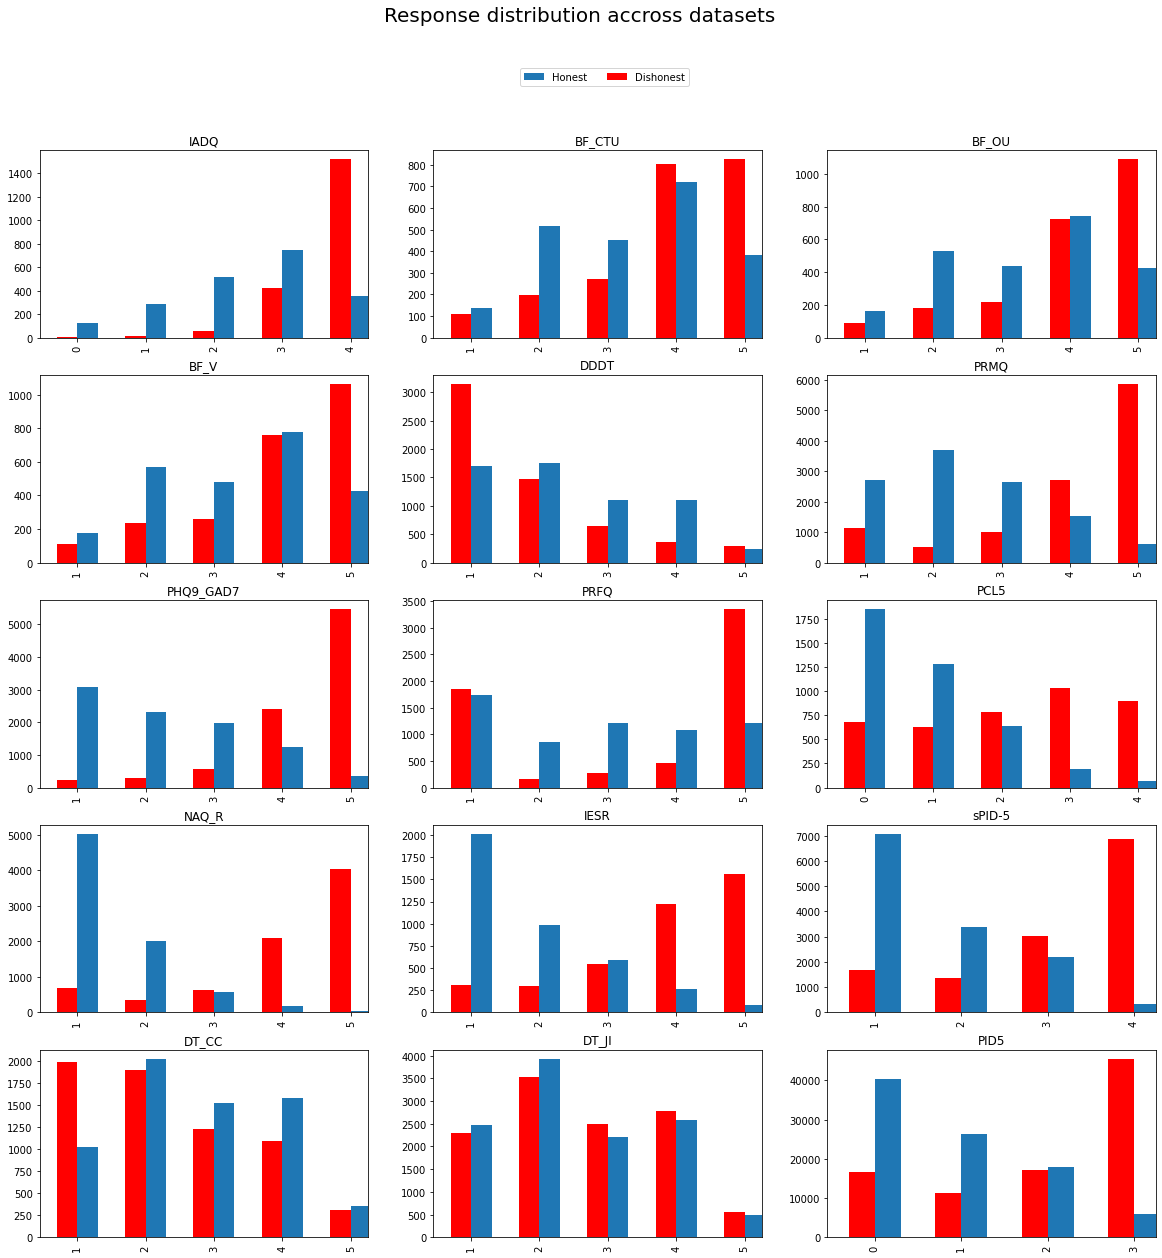

In [ ]:
nrows = 5
ncols = 3

fig = plt.figure(figsize=(20, 20))
axes = fig.subplots(nrows=nrows, ncols=ncols)

for i in range(nrows):
    for j in range(ncols):
      n = i*ncols+j
      ax = axes[i][j]
      globals()[names[n]+"_honest"].iloc[:,0:-1].stack().value_counts().sort_index().plot(ax = ax, kind = 'bar', position = 0, width = 0.3)
      globals()[names[n]+"_dishonest"].iloc[:,0:-1].stack().value_counts().sort_index().plot(ax = ax, kind = 'bar', color = 'red', position = 1, width = 0.3)

      ax.set_title(names[n])

fig.suptitle("Response distribution accross datasets", fontsize=20)
fig.legend(["Honest","Dishonest"], loc = 10, bbox_to_anchor= (0.42, 0.82), ncol = 2)
plt.show()

In [ ]:
# media delle differenze per ogni domanda tra onesti e disonesti
diff = []
for name in names:
  temp = globals()[name+"_dishonest"].iloc[:,0:-1].subtract(globals()[name+"_honest"].iloc[:,0:-1]).values
  diff.append(np.mean(temp, axis = 0))

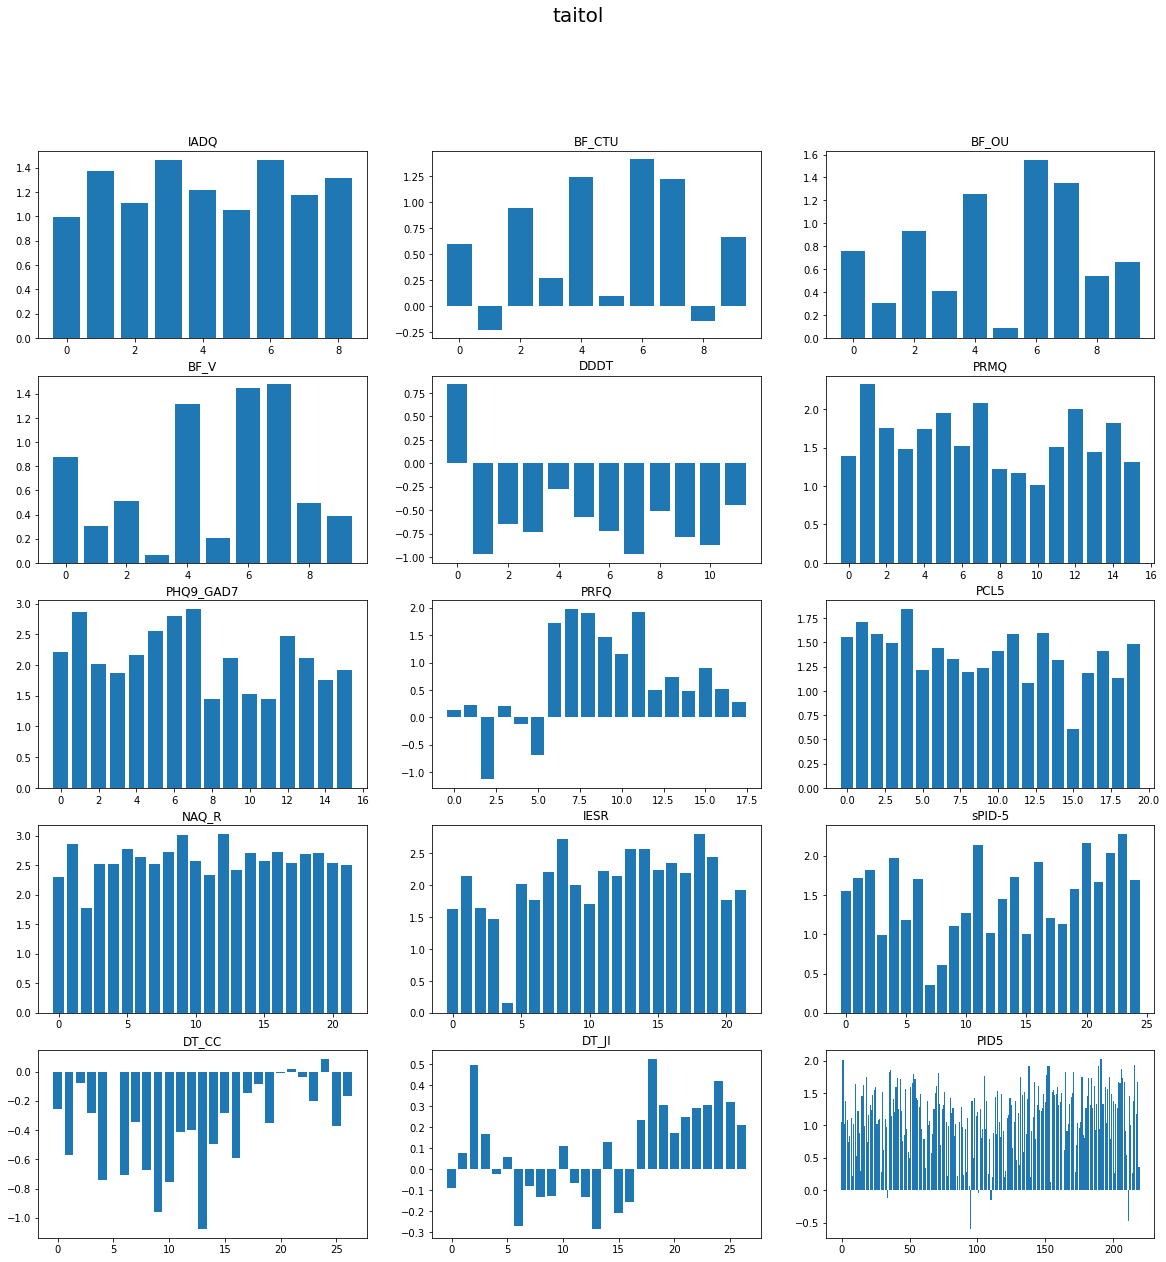

In [ ]:
nrows = 5
ncols = 3

fig = plt.figure(figsize=(20, 20))
axes = fig.subplots(nrows=nrows, ncols=ncols)

for i in range(nrows):
    for j in range(ncols):
      n = i*ncols+j
      ax = axes[i][j]
      ax.bar(np.arange(items[n]),diff[n])

      ax.set_title(names[n])

fig.suptitle("taitol", fontsize=20)
plt.show()

## models

In [ ]:
forest_results_temp =[]
forest_top_20 = []
forest_top_features = []

for index,name in enumerate(names):

  t = [n for n in range(1,items[index]+1)]
  t.append(None)

  grid_params = {
    'n_estimators': (10, 20, 30, 40, 50),
    'criterion': ['entropy'],
    'max_depth': tuple(t),}

  model = GridSearchCV(RandomForestClassifier(random_state = 0), grid_params, n_jobs= -1, cv = 5, return_train_score = True)
  model.fit(globals()[name + "_X_train_val"], globals()[name + "_y_train_val"])

  y_pred_forest = model.best_estimator_.predict(globals()[name + "_X_test"])
  acc = accuracy_score(globals()[name + "_y_test"], y_pred_forest)
  f1 = f1_score(globals()[name + "_y_test"], y_pred_forest, average = 'macro')

  features, features20 = select_top_20(model.best_estimator_.feature_importances_)
  forest_top_20.append(features20)
  forest_top_features.append(features)

  #select_20 = SelectFromModel(estimator = model.best_estimator_, threshold=-np.inf, prefit = True, max_features = (math.ceil(items[index]/5)))
  #temp_X_train_val = select_20.transform(globals()[name + "_X_train_val"])
  #temp_X_test = select_20.transform(globals()[name + "_X_test"])

  temp_X_train_val = globals()[name + "_X_train_val"] [:,features20]
  temp_X_test = globals()[name + "_X_test"][:,features20]

  model.best_estimator_.fit(temp_X_train_val, globals()[name + "_y_train_val"])
  y_pred_forest_20 = model.best_estimator_.predict(temp_X_test)
  acc_20 = accuracy_score(globals()[name + "_y_test"], y_pred_forest_20)
  f1_20 = f1_score(globals()[name + "_y_test"], y_pred_forest_20, average = 'macro')


  print(name, model.best_score_, acc, acc_20, model.best_params_ )

  forest_results_temp.append([name, model.best_score_, acc, acc_20, f1, f1_20, model.best_params_ ])
  forest_results = pd.DataFrame(forest_results_temp, columns = ["Dataset", "Validation accuracy", "Test accuracy", "Top 20% Test accuracy", "f1 score","Top 20% f1 score", "Best Parameters"])

IADQ 0.8518518518518519 0.8666666666666667 0.8666666666666667 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 20}
BF_CTU 0.836360759493671 0.8666666666666667 0.8888888888888888 {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 10}
BF_OU 0.8599471054951513 0.8043478260869565 0.8478260869565217 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}
BF_V 0.8443312434691747 0.8163265306122449 0.8163265306122449 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}
DDDT 0.8094521678410462 0.8383838383838383 0.8484848484848485 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}
PRMQ 0.9390331890331891 0.9078014184397163 0.8652482269503546 {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 30}
PHQ9_GAD7 0.9910546278508449 1.0 0.9910714285714286 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}
PRFQ 0.9098360655737705 0.9264705882352942 0.8676470588235294 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}
PCL5 0.844824961948249

In [ ]:
forest_results

,Dataset,Validation accuracy,Test accuracy,Top 20% Test accuracy,f1 score,Top 20% f1 score,Best Parameters
0,IADQ,0.851852,0.866667,0.866667,0.866601,0.866601,"{'criterion': 'entropy', 'max_depth': 2, 'n_es..."
1,BF_CTU,0.836361,0.866667,0.888889,0.858193,0.880383,"{'criterion': 'entropy', 'max_depth': 4, 'n_es..."
2,BF_OU,0.859947,0.804348,0.847826,0.804255,0.846007,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."
3,BF_V,0.844331,0.816327,0.816327,0.816020,0.816020,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
4,DDDT,0.809452,0.838384,0.848485,0.838235,0.848423,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."
5,PRMQ,0.939033,0.907801,0.865248,0.907335,0.863907,"{'criterion': 'entropy', 'max_depth': 14, 'n_e..."
6,PHQ9_GAD7,0.991055,1.000000,0.991071,1.000000,0.991065,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."
7,PRFQ,0.909836,0.926471,0.867647,0.923681,0.864091,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."
8,PCL5,0.844825,0.804878,0.878049,0.801932,0.875380,"{'criterion': 'entropy', 'max_depth': 17, 'n_e..."
9,NAQ_R,0.956250,0.944444,0.944444,0.943750,0.943750,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."


In [ ]:
svc_results_temp = []
svc_top_20 = []
svc_top_features = []

for index,name in enumerate(names):

  grid_params = {
    'C': [1,0.1,0.01,0.001],
    'kernel': ['linear'],}

  model = GridSearchCV(SVC(random_state = 0), grid_params, n_jobs= -1, cv = 5, return_train_score = True)
  model.fit(globals()[name + "_X_train_val"], globals()[name + "_y_train_val"])

  y_pred_svc = model.best_estimator_.predict(globals()[name + "_X_test"])
  acc = accuracy_score(globals()[name + "_y_test"], y_pred_svc)
  f1 = f1_score(globals()[name + "_y_test"], y_pred_svc, average = 'macro')

  features, features20 = select_top_20(model.best_estimator_.coef_[0])
  svc_top_20.append(features20)
  svc_top_features.append(features)

  #select_20 = SelectFromModel(estimator = model.best_estimator_, threshold=-np.inf, prefit = True, max_features = (math.ceil(items[index]/5)))
  #temp_X_train_val = select_20.transform(globals()[name + "_X_train_val"])
  #temp_X_test = select_20.transform(globals()[name + "_X_test"])

  temp_X_train_val = globals()[name + "_X_train_val"] [:,features20]
  temp_X_test = globals()[name + "_X_test"][:,features20]

  model.best_estimator_.fit(temp_X_train_val, globals()[name + "_y_train_val"])
  y_pred_svc_20 = model.best_estimator_.predict(temp_X_test)
  acc_20 = accuracy_score(globals()[name + "_y_test"], y_pred_svc_20)
  f1_20 = f1_score(globals()[name + "_y_test"], y_pred_svc_20, average = 'macro')

  print(name, model.best_score_, acc, acc_20, model.best_params_ )

  svc_results_temp.append([name, model.best_score_, acc, acc_20, f1, f1_20, model.best_params_ ])
  svc_results = pd.DataFrame(svc_results_temp, columns = ["Dataset", "Validation accuracy", "Test accuracy", "Top 20% Test accuracy", "f1 score","Top 20% f1 score", "Best Parameters"])

IADQ 0.8444444444444444 0.8888888888888888 0.8666666666666667 {'C': 1, 'kernel': 'linear'}
BF_CTU 0.8388607594936708 0.8666666666666667 0.7555555555555555 {'C': 0.01, 'kernel': 'linear'}
BF_OU 0.828563032618278 0.8043478260869565 0.8043478260869565 {'C': 1, 'kernel': 'linear'}
BF_V 0.8168495297805644 0.7551020408163265 0.7959183673469388 {'C': 0.01, 'kernel': 'linear'}
DDDT 0.7677712181806641 0.797979797979798 0.6262626262626263 {'C': 0.01, 'kernel': 'linear'}
PRMQ 0.9034192860279816 0.8865248226950354 0.8723404255319149 {'C': 0.001, 'kernel': 'linear'}
PHQ9_GAD7 0.9890547263681592 1.0 0.9910714285714286 {'C': 1, 'kernel': 'linear'}
PRFQ 0.9098360655737705 0.9117647058823529 0.8676470588235294 {'C': 0.01, 'kernel': 'linear'}
PCL5 0.8364535768645357 0.9024390243902439 0.8780487804878049 {'C': 0.001, 'kernel': 'linear'}
NAQ_R 0.9546875 0.9444444444444444 0.9444444444444444 {'C': 0.01, 'kernel': 'linear'}
IESR 0.9441346153846155 0.9722222222222222 0.9722222222222222 {'C': 0.01, 'kernel': 

In [ ]:
svc_results

,Dataset,Validation accuracy,Test accuracy,Top 20% Test accuracy,f1 score,Top 20% f1 score,Best Parameters
0,IADQ,0.844444,0.888889,0.866667,0.888669,0.866601,"{'C': 1, 'kernel': 'linear'}"
1,BF_CTU,0.838861,0.866667,0.755556,0.861111,0.736842,"{'C': 0.01, 'kernel': 'linear'}"
2,BF_OU,0.828563,0.804348,0.804348,0.803512,0.803512,"{'C': 1, 'kernel': 'linear'}"
3,BF_V,0.816850,0.755102,0.795918,0.755000,0.795833,"{'C': 0.01, 'kernel': 'linear'}"
4,DDDT,0.767771,0.797980,0.626263,0.797794,0.623806,"{'C': 0.01, 'kernel': 'linear'}"
5,PRMQ,0.903419,0.886525,0.872340,0.885226,0.870879,"{'C': 0.001, 'kernel': 'linear'}"
6,PHQ9_GAD7,0.989055,1.000000,0.991071,1.000000,0.991065,"{'C': 1, 'kernel': 'linear'}"
7,PRFQ,0.909836,0.911765,0.867647,0.907859,0.864091,"{'C': 0.01, 'kernel': 'linear'}"
8,PCL5,0.836454,0.902439,0.878049,0.894872,0.866623,"{'C': 0.001, 'kernel': 'linear'}"
9,NAQ_R,0.954688,0.944444,0.944444,0.943750,0.943750,"{'C': 0.01, 'kernel': 'linear'}"


In [ ]:
tree_results_temp =[]
tree_top_20 = []
tree_top_features = []

for index,name in enumerate(names):

  t = [n for n in range(1,items[index]+1)]
  t.append(None)

  grid_params = {
    'criterion': ['entropy'],
    'max_depth': tuple(t),}

  model = GridSearchCV(DecisionTreeClassifier(random_state = 0), grid_params, n_jobs= -1, cv = 5, return_train_score = True)
  model.fit(globals()[name + "_X_train_val"], globals()[name + "_y_train_val"])

  y_pred_tree = model.best_estimator_.predict(globals()[name + "_X_test"])
  acc = accuracy_score(globals()[name + "_y_test"], y_pred_tree)
  f1 = f1_score(globals()[name + "_y_test"], y_pred_tree, average = 'macro')

  features, features20 = select_top_20(model.best_estimator_.feature_importances_)
  tree_top_20.append(features20)
  tree_top_features.append(features)

  #select_20 = SelectFromModel(estimator = model.best_estimator_, threshold=-np.inf, prefit = True, max_features = (math.ceil(items[index]/5)))
  #temp_X_train_val = select_20.transform(globals()[name + "_X_train_val"])
  #temp_X_test = select_20.transform(globals()[name + "_X_test"])

  temp_X_train_val = globals()[name + "_X_train_val"] [:,features20]
  temp_X_test = globals()[name + "_X_test"][:,features20]

  model.best_estimator_.fit(temp_X_train_val, globals()[name + "_y_train_val"])
  y_pred_tree_20 = model.best_estimator_.predict(temp_X_test)
  acc_20 = accuracy_score(globals()[name + "_y_test"], y_pred_tree_20)
  f1_20 = f1_score(globals()[name + "_y_test"], y_pred_tree_20, average = 'macro')

  print(name, model.best_score_, acc, acc_20, model.best_params_ )

  tree_results_temp.append([name, model.best_score_, acc, acc_20, f1, f1_20, model.best_params_ ])
  tree_results = pd.DataFrame(tree_results_temp, columns = ["Dataset", "Validation accuracy", "Test accuracy", "Top 20% Test accuracy" ,"f1 score","Top 20% f1 score", "Best Parameters"])

IADQ 0.819753086419753 0.8444444444444444 0.8666666666666667 {'criterion': 'entropy', 'max_depth': 5}
BF_CTU 0.8263607594936708 0.8666666666666667 0.8666666666666667 {'criterion': 'entropy', 'max_depth': 2}
BF_OU 0.8310020570085219 0.782608695652174 0.717391304347826 {'criterion': 'entropy', 'max_depth': 5}
BF_V 0.7939655172413793 0.6938775510204082 0.673469387755102 {'criterion': 'entropy', 'max_depth': 5}
DDDT 0.7542245921411794 0.7575757575757576 0.8383838383838383 {'criterion': 'entropy', 'max_depth': 5}
PRMQ 0.9002478198130373 0.8723404255319149 0.900709219858156 {'criterion': 'entropy', 'max_depth': 7}
PHQ9_GAD7 0.9681936850401458 1.0 0.9821428571428571 {'criterion': 'entropy', 'max_depth': 6}
PRFQ 0.8770491803278688 0.8823529411764706 0.8970588235294118 {'criterion': 'entropy', 'max_depth': 4}
PCL5 0.8031963470319635 0.8780487804878049 0.8780487804878049 {'criterion': 'entropy', 'max_depth': 3}
NAQ_R 0.9375 0.9166666666666666 0.9166666666666666 {'criterion': 'entropy', 'max_dept

In [ ]:
tree_results

,Dataset,Validation accuracy,Test accuracy,Top 20% Test accuracy,f1 score,Top 20% f1 score,Best Parameters
0,IADQ,0.819753,0.844444,0.866667,0.844444,0.866601,"{'criterion': 'entropy', 'max_depth': 5}"
1,BF_CTU,0.826361,0.866667,0.866667,0.858193,0.858193,"{'criterion': 'entropy', 'max_depth': 2}"
2,BF_OU,0.831002,0.782609,0.717391,0.782609,0.714012,"{'criterion': 'entropy', 'max_depth': 5}"
3,BF_V,0.793966,0.693878,0.673469,0.689218,0.666667,"{'criterion': 'entropy', 'max_depth': 5}"
4,DDDT,0.754225,0.757576,0.838384,0.757353,0.838235,"{'criterion': 'entropy', 'max_depth': 5}"
5,PRMQ,0.900248,0.872340,0.900709,0.871818,0.899858,"{'criterion': 'entropy', 'max_depth': 7}"
6,PHQ9_GAD7,0.968194,1.000000,0.982143,1.000000,0.982137,"{'criterion': 'entropy', 'max_depth': 6}"
7,PRFQ,0.877049,0.882353,0.897059,0.879752,0.893154,"{'criterion': 'entropy', 'max_depth': 4}"
8,PCL5,0.803196,0.878049,0.878049,0.870335,0.870335,"{'criterion': 'entropy', 'max_depth': 3}"
9,NAQ_R,0.937500,0.916667,0.916667,0.915625,0.915625,"{'criterion': 'entropy', 'max_depth': 3}"


In [ ]:
knn_results_temp =[]
knn_top_20 = []
knn_top_features = []

for index,name in enumerate(names):

  grid_params = {
    'n_neighbors': (2,3,4,5,6,7,8,9,10),}

  model = GridSearchCV(KNeighborsClassifier(), grid_params, n_jobs= -1, cv = 5, return_train_score = True)
  model.fit(globals()[name + "_X_train_val"], globals()[name + "_y_train_val"])

  y_pred_knn = model.best_estimator_.predict(globals()[name + "_X_test"])
  acc = accuracy_score(globals()[name + "_y_test"], y_pred_knn)
  f1 = f1_score(globals()[name + "_y_test"], y_pred_knn, average = 'macro')

  permutations = permutation_importance(model.best_estimator_, globals()[name + "_X_train_val"], globals()[name + "_y_train_val"], scoring='accuracy', n_repeats = 20)
  features, features20 = select_top_20(permutations.importances_mean)
  knn_top_20.append(features20)
  knn_top_features.append(features)

  temp_X_train_val = globals()[name + "_X_train_val"] [:,features20]
  temp_X_test = globals()[name + "_X_test"][:,features20]

  model.best_estimator_.fit(temp_X_train_val, globals()[name + "_y_train_val"])
  y_pred_knn_20 = model.best_estimator_.predict(temp_X_test)
  
  acc_20 = accuracy_score(globals()[name + "_y_test"], y_pred_knn_20)
  f1_20 = f1_score(globals()[name + "_y_test"], y_pred_knn_20, average = 'macro')

  print(name, model.best_score_, acc, acc_20, model.best_params_ )

  knn_results_temp.append([name, model.best_score_, acc, acc_20, f1, f1_20, model.best_params_ ])
  knn_results = pd.DataFrame(knn_results_temp, columns = ["Dataset", "Validation accuracy", "Test accuracy", "Top 20% Test accuracy" ,"f1 score","Top 20% f1 score", "Best Parameters"])


IADQ 0.8345679012345679 0.8444444444444444 0.8666666666666667 {'n_neighbors': 7}
BF_CTU 0.8311708860759494 0.8888888888888888 0.8666666666666667 {'n_neighbors': 6}
BF_OU 0.8163385248310314 0.7608695652173914 0.717391304347826 {'n_neighbors': 10}
BF_V 0.8259665621734588 0.6938775510204082 0.8163265306122449 {'n_neighbors': 3}
DDDT 0.7621215006665397 0.797979797979798 0.7474747474747475 {'n_neighbors': 9}
PRMQ 0.905759457933371 0.8439716312056738 0.8723404255319149 {'n_neighbors': 5}
PHQ9_GAD7 0.9860844293384563 1.0 1.0 {'n_neighbors': 7}
PRFQ 0.9114754098360656 0.9264705882352942 0.8676470588235294 {'n_neighbors': 9}
PCL5 0.8308980213089804 0.7804878048780488 0.9024390243902439 {'n_neighbors': 10}
NAQ_R 0.95625 0.9444444444444444 0.9305555555555556 {'n_neighbors': 2}
IESR 0.9441346153846155 0.9722222222222222 0.9722222222222222 {'n_neighbors': 4}
sPID-5 0.9657466505663848 0.9230769230769231 0.9230769230769231 {'n_neighbors': 7}
DT_CC 0.7136059877038224 0.6938775510204082 0.7346938775510

In [ ]:
knn_results

,Dataset,Validation accuracy,Test accuracy,Top 20% Test accuracy,f1 score,Top 20% f1 score,Best Parameters
0,IADQ,0.834568,0.844444,0.866667,0.844444,0.866601,{'n_neighbors': 7}
1,BF_CTU,0.831171,0.888889,0.866667,0.885263,0.858193,{'n_neighbors': 6}
2,BF_OU,0.816339,0.760870,0.717391,0.760757,0.714012,{'n_neighbors': 10}
3,BF_V,0.825967,0.693878,0.816327,0.693878,0.816020,{'n_neighbors': 3}
4,DDDT,0.762122,0.797980,0.747475,0.797463,0.746544,{'n_neighbors': 9}
5,PRMQ,0.905759,0.843972,0.872340,0.843586,0.871818,{'n_neighbors': 5}
6,PHQ9_GAD7,0.986084,1.000000,1.000000,1.000000,1.000000,{'n_neighbors': 7}
7,PRFQ,0.911475,0.926471,0.867647,0.923681,0.865287,{'n_neighbors': 9}
8,PCL5,0.830898,0.780488,0.902439,0.775684,0.899510,{'n_neighbors': 10}
9,NAQ_R,0.956250,0.944444,0.930556,0.943750,0.929893,{'n_neighbors': 2}


##top 20 features

In [ ]:
print("Average accuracy on datasets")
print(f"{'Model' : <20}{'All features' : ^15}{ 'Top 20% features' : ^15}")
print(f"{'Random Forest' : <20}{round(forest_results.iloc[:,2].mean(), 3) : ^15}{round(forest_results.iloc[:,3].mean(), 3) : ^15}")
print(f"{'Decision Tree' : <20}{round(tree_results.iloc[:,2].mean(), 3) : ^15}{round(tree_results.iloc[:,3].mean(), 3) : ^15}")
print(f"{'SVC' : <20}{round(svc_results.iloc[:,2].mean(), 3) : ^15}{round(svc_results.iloc[:,3].mean(), 3) : ^15}")
print(f"{'KNN' : <20}{round(knn_results.iloc[:,2].mean(), 3) : ^15}{round(knn_results.iloc[:,3].mean(), 3) : ^15}")

Average accuracy on datasets
Model                All features  Top 20% features
Random Forest            0.866          0.866     
Decision Tree            0.832          0.838     
SVC                      0.867          0.818     
KNN                      0.835          0.852     


In [ ]:
print("Average f1 score on datasets")
print(f"{'Model' : <20}{'All features' : ^15}{ 'Top 20% features' : ^15}")
print(f"{'Random Forest' : <20}{round(forest_results.iloc[:,4].mean(), 3) : ^15}{round(forest_results.iloc[:,5].mean(), 3) : ^15}")
print(f"{'Decision Tree' : <20}{round(tree_results.iloc[:,4].mean(), 3) : ^15}{round(tree_results.iloc[:,5].mean(), 3) : ^15}")
print(f"{'SVC' : <20}{round(svc_results.iloc[:,4].mean(), 3) : ^15}{round(svc_results.iloc[:,5].mean(), 3) : ^15}")
print(f"{'KNN' : <20}{round(knn_results.iloc[:,4].mean(), 3) : ^15}{round(knn_results.iloc[:,5].mean(), 3) : ^15}")

Average f1 score on datasets
Model                All features  Top 20% features
Random Forest            0.865          0.864     
Decision Tree            0.829          0.835     
SVC                      0.865          0.815     
KNN                      0.834          0.85      


In [ ]:
for i, name in enumerate(names):
  print(name + ": ",forest_top_20[i],tree_top_20[i],svc_top_20[i],knn_top_20[i])

IADQ:  [4, 1] [1, 4] [1, 4] [1, 4]
BF_CTU:  [6, 4] [6, 4] [4, 2] [4, 6]
BF_OU:  [6, 7] [6, 0] [6, 0] [6, 2]
BF_V:  [7, 4] [7, 0] [4, 7] [7, 4]
DDDT:  [0, 10, 1] [10, 0, 1] [0, 4, 11] [0, 7, 10]
PRMQ:  [7, 1, 12, 14] [1, 7, 12, 4] [1, 12, 5, 7] [1, 12, 5, 4]
PHQ9_GAD7:  [7, 1, 6, 0] [1, 7, 6, 12] [7, 0, 1, 6] [7, 13, 5, 6]
PRFQ:  [8, 7, 11, 6] [8, 6, 15, 2] [8, 11, 6, 15] [8, 2, 11, 7]
PCL5:  [0, 4, 2, 11] [4, 13, 18, 10] [4, 11, 1, 2] [11, 19, 18, 13]
NAQ_R:  [12, 16, 9, 1, 8] [12, 16, 6, 21, 13] [9, 12, 21, 1, 5] [17, 0, 15, 6, 3]
IESR:  [8, 18, 15, 14, 13] [8, 14, 15, 11, 6] [18, 8, 1, 16, 19] [18, 14, 16, 1, 11]
sPID-5:  [20, 23, 11, 4, 2] [23, 20, 16, 14, 11] [23, 11, 20, 16, 2] [23, 20, 24, 14, 2]
DT_CC:  [10, 13, 9, 6, 8, 4] [9, 10, 13, 8, 25, 16] [2, 17, 5, 18, 24, 23] [9, 10, 5, 13, 8, 2]
DT_JI:  [24, 2, 18, 19, 22, 15] [2, 18, 6, 11, 9, 17] [2, 18, 17, 14, 3, 10] [2, 18, 15, 19, 6, 10]
PID5:  [1, 71, 152, 35, 153, 189, 206, 51, 54, 197, 135, 191, 200, 10, 18, 69, 160, 132, 63,

In [ ]:
print("Common top 20% items beetwen the models")
print(f"{'Dataset': <10}{'Percentage' : ^10}")
for i, name in enumerate(names):
  a = set(forest_top_20[i])
  b = set(tree_top_20[i])
  c = set(svc_top_20[i])
  d = set(knn_top_20[i])
  r = len(a & b & c & d)/len(a)
  print(f"{name : <10}{str(round((r*100),2)) + '%' : ^10}")

Common top 20% items beetwen the models
Dataset   Percentage
IADQ        100.0%  
BF_CTU      50.0%   
BF_OU       50.0%   
BF_V        50.0%   
DDDT        33.33%  
PRMQ        50.0%   
PHQ9_GAD7   50.0%   
PRFQ        25.0%   
PCL5         0.0%   
NAQ_R        0.0%   
IESR         0.0%   
sPID-5      40.0%   
DT_CC        0.0%   
DT_JI       33.33%  
PID5        9.09%   


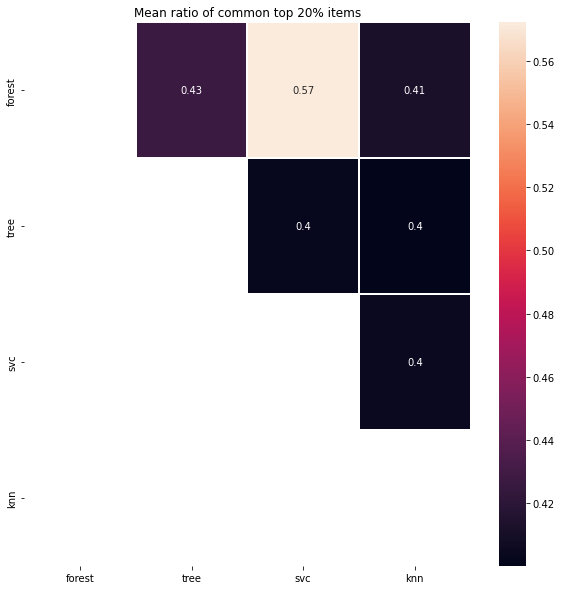

In [ ]:
models = ["forest", "tree", "svc", "knn"]
temp = np.zeros((len(models),len(models)))
for i,elem1 in enumerate(models):
  for j,elem2 in enumerate(models):
    sum = 0
    for n,name in enumerate(names):
      a = set(globals()[elem1 + "_top_20"][n])
      b = set(globals()[elem2 + "_top_20"][n])
      sum += (len(a & b)/len(a))*items[n] 
    temp[i][j] = sum/items_sum

common_matrix = pd.DataFrame(temp, columns = models, index = models)
mask = np.tril(np.ones_like(common_matrix))

plt.figure(figsize=(10,10))
heat_map = sns.heatmap(common_matrix, linewidth = 1 , annot = True, mask = mask)
plt.title( "Mean ratio of common top 20% items" )
plt.show()

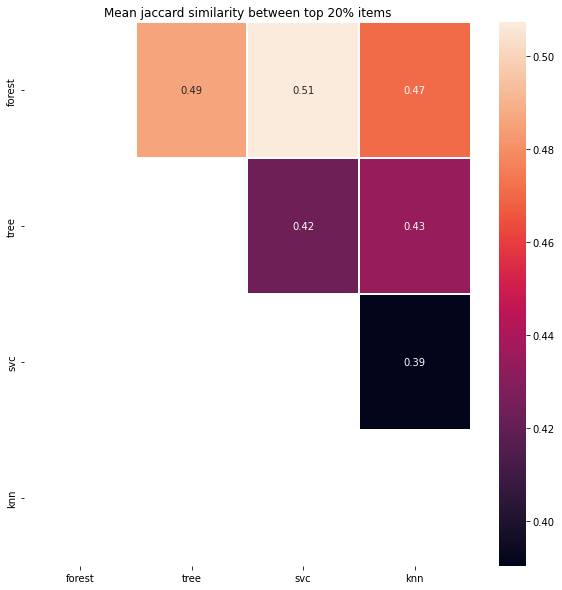

In [ ]:
temp = np.zeros((len(models),len(models)))
for i,elem1 in enumerate(models):
  for j,elem2 in enumerate(models):
    sum = 0
    for n,name in enumerate(names):
      a = set(globals()[elem1 + "_top_20"][n])
      b = set(globals()[elem2 + "_top_20"][n])
      sum += jaccard_similarity(a,b)
    temp[i][j] = sum/len(names)

jaccard_matrix = pd.DataFrame(temp, columns = models, index = models)
mask = np.tril(np.ones_like(jaccard_matrix))

plt.figure(figsize=(10,10))
heat_map = sns.heatmap(jaccard_matrix, linewidth = 1 , annot = True, mask = mask)
plt.title( "Mean jaccard similarity between top 20% items" )
plt.show()

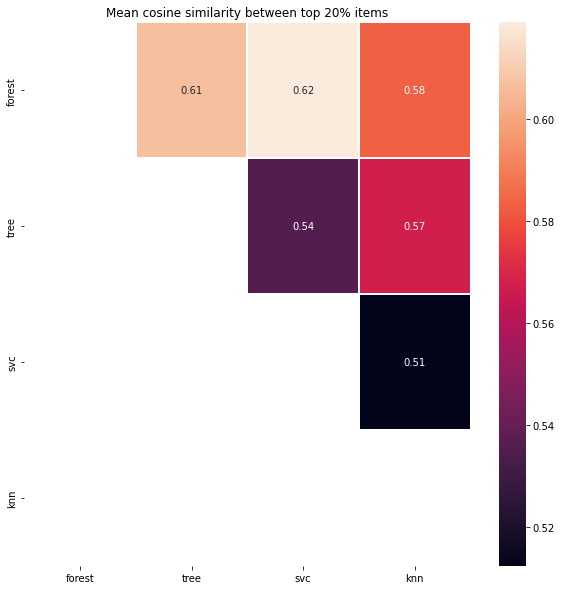

In [ ]:
temp = np.zeros((len(models),len(models)))
for i,elem1 in enumerate(models):
  for j,elem2 in enumerate(models):
    sum = 0
    for n,name in enumerate(names):
      a = [int(elem in globals()[elem1 + "_top_20"][n]) for elem in np.arange(items[n])]
      b = [int(elem in globals()[elem2 + "_top_20"][n]) for elem in np.arange(items[n])]
      sum += cosine_similarity(a,b)
    temp[i][j] = sum/len(names)

cosine_matrix = pd.DataFrame(temp, columns = models, index = models)
mask = np.tril(np.ones_like(cosine_matrix))

plt.figure(figsize=(10,10))
heat_map = sns.heatmap(cosine_matrix, linewidth = 1 , annot = True, mask = mask)
plt.title( "Mean cosine similarity between top 20% items" )
plt.show()

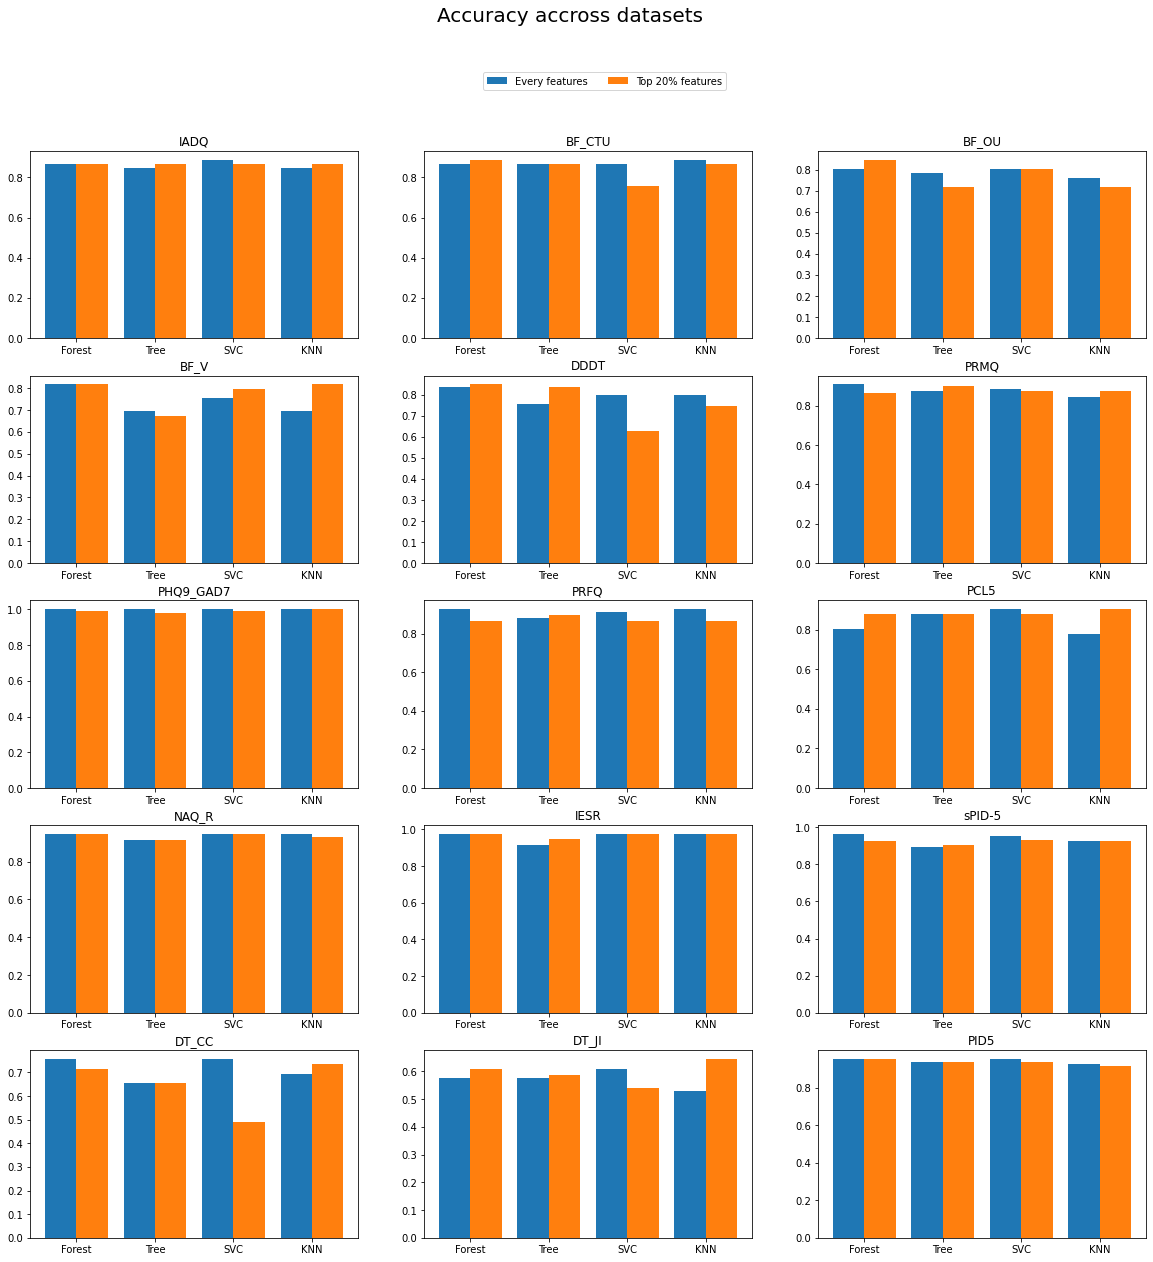

In [ ]:
X = ["Forest","Tree","SVC","KNN"]
X_axis = np.arange(len(X))

nrows = 5
ncols = 3

fig = plt.figure(figsize=(20, 20))
axes = fig.subplots(nrows=nrows, ncols=ncols)

for i in range(nrows):
    for j in range(ncols):
      n = i*ncols+j
      ax = axes[i][j]
      ax.bar(X_axis - 0.2, [forest_results_temp[n][2],tree_results_temp[n][2],svc_results_temp[n][2],knn_results_temp[n][2]], 0.4)
      ax.bar(X_axis + 0.2, [forest_results_temp[n][3],tree_results_temp[n][3],svc_results_temp[n][3],knn_results_temp[n][3]], 0.4)
      ax.set_xticks(X_axis)
      ax.set_xticklabels(X)
      ax.set_title(names[n])

fig.suptitle("Accuracy accross datasets", fontsize=20)
fig.legend(["Every features","Top 20% features"], loc = 10, bbox_to_anchor= (0.42, 0.82), ncol = 2)
plt.show()

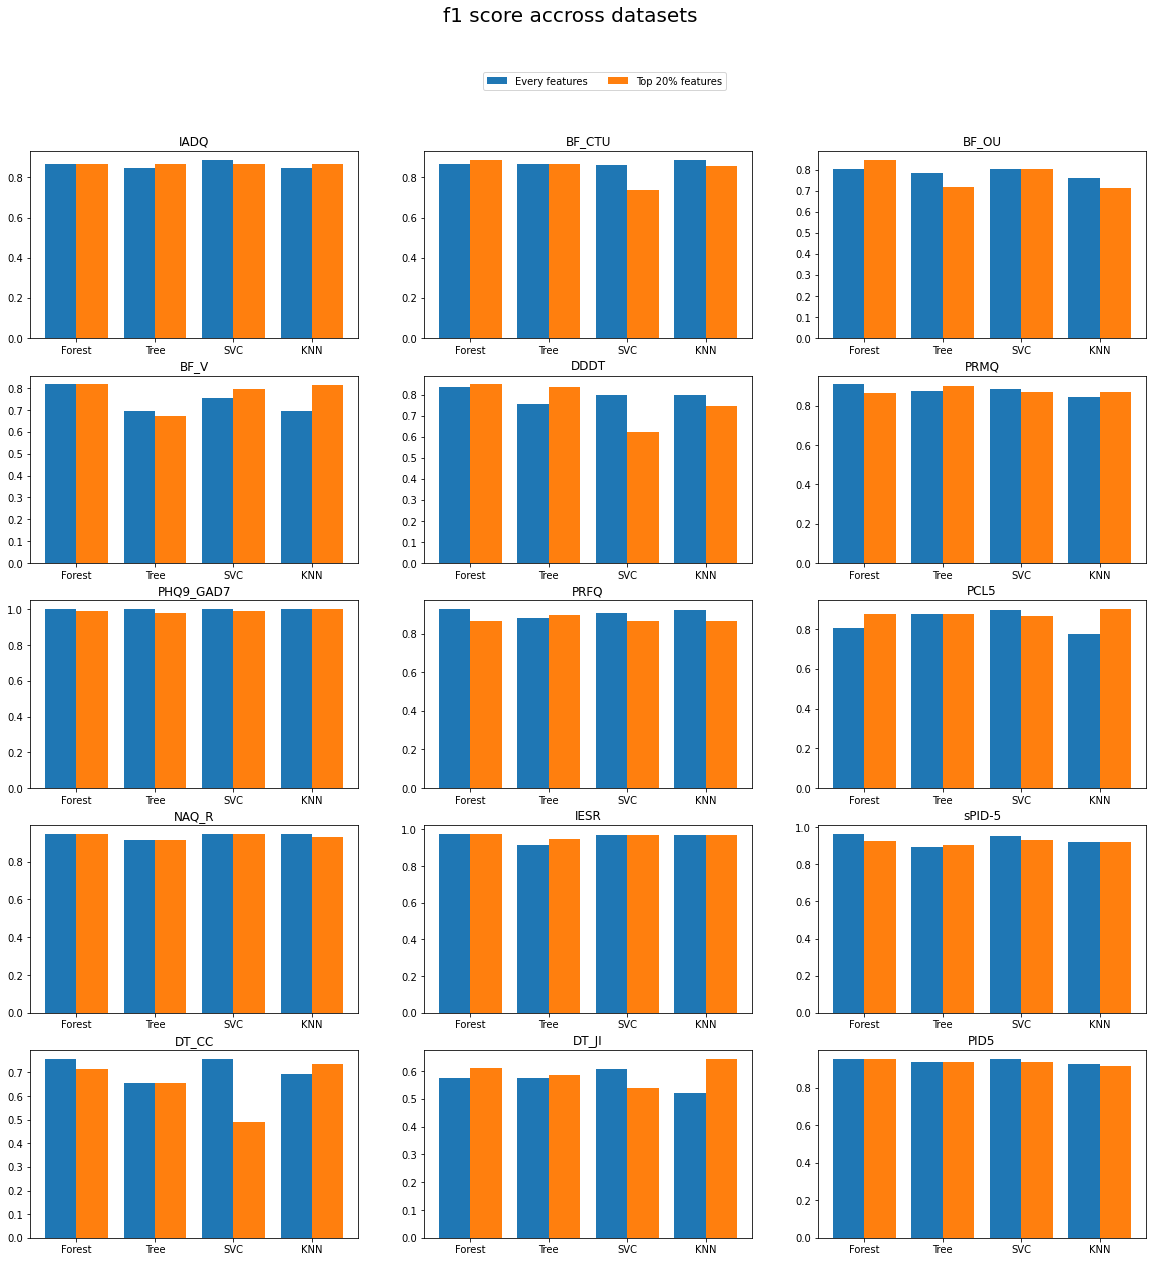

In [ ]:
X = ["Forest","Tree","SVC","KNN"]
X_axis = np.arange(len(X))

nrows = 5
ncols = 3

fig = plt.figure(figsize=(20, 20))
axes = fig.subplots(nrows=nrows, ncols=ncols)

for i in range(nrows):
    for j in range(ncols):
      n = i*ncols+j
      ax = axes[i][j]
      ax.bar(X_axis - 0.2, [forest_results_temp[n][2],tree_results_temp[n][2],svc_results_temp[n][4],knn_results_temp[n][4]], 0.4)
      ax.bar(X_axis + 0.2, [forest_results_temp[n][3],tree_results_temp[n][3],svc_results_temp[n][5],knn_results_temp[n][5]], 0.4)
      ax.set_xticks(X_axis)
      ax.set_xticklabels(X)
      ax.set_title(names[n])

fig.suptitle("f1 score accross datasets", fontsize=20)
fig.legend(["Every features","Top 20% features"], loc = 10, bbox_to_anchor= (0.42, 0.82), ncol = 2)
plt.show()